In [1]:
import pickle
import os
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# ------------------------------------------------------------------
# Script para PCA en CIFAR-100: clases "class1" y "class2"
# ------------------------------------------------------------------

def unpickle(file_path):
    """Carga un archivo pickle de Python y devuelve el diccionario."""
    with open(file_path, 'rb') as fo:
        return pickle.load(fo, encoding='bytes')

# Ruta a la carpeta donde tienes la versión Python de CIFAR-100
cifar100_path = r"C:\Heri\GitHub\.Semester\Data-Mining\07-Reduccion-de-Dimensionalidad\02-Ejercicio\cifar-10-batches-py"

In [3]:
# Carga de los datos de entrenamiento y metadatos
train_dict = unpickle(os.path.join(cifar100_path, 'data_batch_1'))
meta_dict  = unpickle(os.path.join(cifar100_path, 'batches.meta'))

In [4]:
meta_dict

{b'num_cases_per_batch': 10000,
 b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_vis': 3072}

In [5]:
class1 = 'bird'
class2 = 'automobile'
class3 = 'cat'
class4 = 'deer'

In [6]:

# Decodificar nombres de clases
fine_label_names = [name.decode('utf-8') for name in meta_dict[b'label_names']]

# Obtener los índices de las clases class1 y class2
idx_class1 = fine_label_names.index(class1)
idx_class2 = fine_label_names.index(class2)
idx_class3 = fine_label_names.index(class3)
idx_class4 = fine_label_names.index(class4)

In [7]:
# Convertir datos y etiquetas a numpy
data = train_dict[b'data']               # (50000, 3072)
labels = np.array(train_dict[b'labels'])

In [8]:
# Filtrar solo las muestras de class1 y class2
mask = np.isin(labels, [idx_class1, idx_class2, idx_class3, idx_class4])
X = data[mask]
y = labels[mask]

In [9]:
# Pipeline: escalado + PCA
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

In [10]:
# Ajustar PCA (sin supervisión) y transformar
X_pca = pipeline.fit_transform(X)
explained_variance = pipeline.named_steps['pca'].explained_variance_ratio_

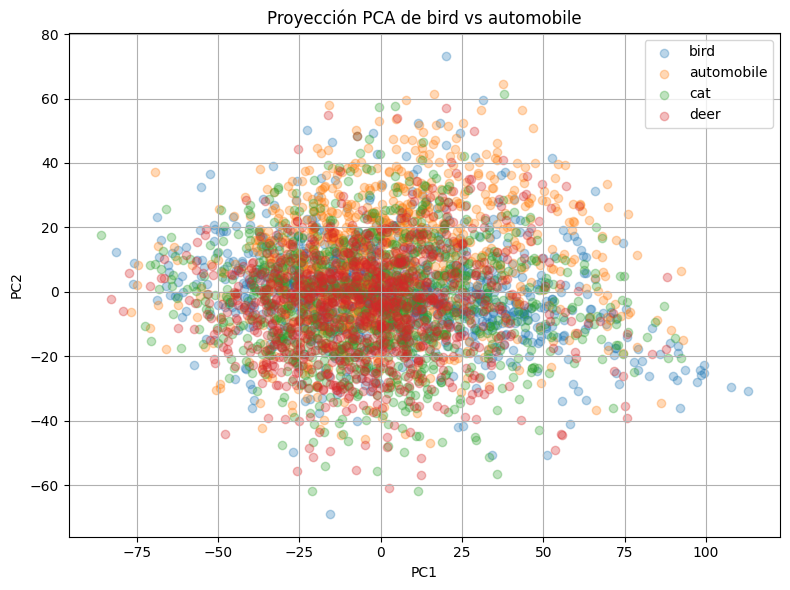

In [11]:
# --------------------------------------------------
# Gráfico 1: Proyección 2D con etiquetas coloreadas
# --------------------------------------------------
plt.figure(figsize=(8,6))
# class1
mask_1 = (y == idx_class1)
plt.scatter(X_pca[mask_1, 0], X_pca[mask_1, 1], marker='o', label=class1, alpha=0.3)
# class2
mask_2 = (y == idx_class2)
plt.scatter(X_pca[mask_2, 0], X_pca[mask_2, 1], marker='o', label=class2, alpha=0.3)
# class3
mask_3 = (y == idx_class3)
plt.scatter(X_pca[mask_3, 0], X_pca[mask_3, 1], marker='o', label=class3, alpha=0.3)
# class4
mask_4 = (y == idx_class4)
plt.scatter(X_pca[mask_4, 0], X_pca[mask_4, 1], marker='o', label=class4, alpha=0.3)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'Proyección PCA de {class1} vs {class2}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

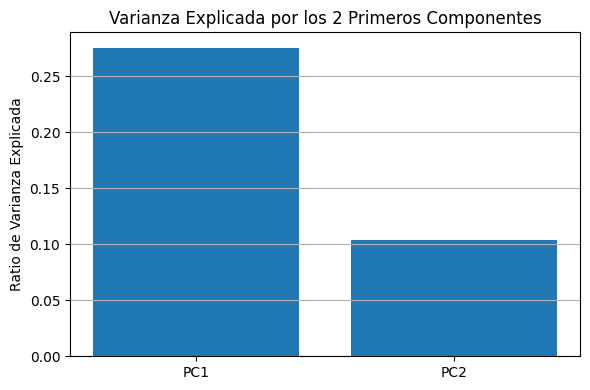

In [12]:

# --------------------------------------------------
# Gráfico 2: Varianza explicada por PC1 y PC2
# --------------------------------------------------
plt.figure(figsize=(6,4))
plt.bar([1, 2], explained_variance, tick_label=['PC1', 'PC2'])
plt.ylabel('Ratio de Varianza Explicada')
plt.title('Varianza Explicada por los 2 Primeros Componentes')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [13]:
# Pipeline: escalado + PCA
pipeline3 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3))
])

In [14]:
# Ajustar PCA (sin supervisión) y transformar
X_pca3 = pipeline3.fit_transform(X)
explained_variance3 = pipeline3.named_steps['pca'].explained_variance_ratio_

# get the vectors of the 3D PCA
pca_vectors = pipeline3.named_steps['pca'].components_


In [15]:
explained_variance3

array([0.27541728, 0.10415322, 0.0630143 ])

In [16]:
pca_vectors

array([[ 0.02250392,  0.02278428,  0.02296208, ...,  0.01990117,
         0.02003476,  0.01995699],
       [ 0.01800164,  0.01844916,  0.0190394 , ..., -0.01584852,
        -0.01477623, -0.01377621],
       [-0.014504  , -0.01471306, -0.01439154, ..., -0.01821476,
        -0.01785131, -0.01713969]])

In [19]:
import plotly.graph_objects as go

In [25]:
fig = go.Figure()

# class1
fig.add_trace(go.Scatter3d(
    x=X_pca3[mask_1, 0],
    y=X_pca3[mask_1, 1],
    z=X_pca3[mask_1, 2],
    mode='markers',
    marker=dict(size=5, opacity=0.3),
    name=class1
))

# class2
fig.add_trace(go.Scatter3d(
    x=X_pca3[mask_2, 0],
    y=X_pca3[mask_2, 1],
    z=X_pca3[mask_2, 2],
    mode='markers',
    marker=dict(size=5, opacity=0.3),
    name=class2
))

# class3
fig.add_trace(go.Scatter3d(
    x=X_pca3[mask_3, 0],
    y=X_pca3[mask_3, 1],
    z=X_pca3[mask_3, 2],
    mode='markers',
    marker=dict(size=5, opacity=0.3),
    name=class3
))

# class4
fig.add_trace(go.Scatter3d(
    x=X_pca3[mask_4, 0],
    y=X_pca3[mask_4, 1],
    z=X_pca3[mask_4, 2],
    mode='markers',
    marker=dict(size=5, opacity=0.3),
    name=class4
))

fig.update_layout(
    title=f'Proyección PCA 3D de {class1}, {class2}, {class3}, {class4}',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)


# Zoom out the camera
fig.update_layout(scene_camera=dict(eye=dict(x=2, y=2, z=2)))

# Change the title font size
fig.update_layout(title_font=dict(size=20, color='black', family='Arial'))

fig.show()
